# Module 3 Final Project Submission
* Student name: **Chelsea Power**
* Student pace: **part time**
* Scheduled project review date/time: **July 9, 2019 at 4:30 pm ET**
* Instructor name: **Joe San Pietro**
* Blog post URL: **TBD**

## Purpose

For this project, I will be using music streaming session data from Spotify to with 27 features to determine if a track will be played or skipped using the predictor variable **not_skipped**. https://developer.spotify.com/documentation/web-api/reference/object-model/


## Data Dictionary

* **duration**: Length of track in seconds
* **release_year**: Estimate of year the track was released
* **us_popularity_estimate**: Estimate of the US popularity percentile of the track as of October 12, 2018
* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* **flatness**: See accousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* **mechanism**: See accousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* **acoustic_vector_0**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_1**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_2**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_3**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_4**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_5**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_6**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_7**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* <span style="color:green">**not_skipped**: Target variable. Boolean indicating that the track was played
in its entirety</span>
* **hist_user_behavior_n_seekfwd**: Number of times the user did a seek forward within track
* **hist_user_behavior_n_seekback**: Number of times the user did a seek back within track
* **hour_of_day**: {0-23} - The hour of day
* <span style="color:gray">**premium**: Boolean indicating if the user was on premium or not. This has potential implications for skipping behavior.</span>

## Understand and Loading the Datasets

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

df_log = pd.read_csv('log_mini.csv')

#Look at size of the dataset
df_log.shape

(167880, 21)

In [2]:
#Look at the columns and first 10 rows of the dataset
df_log.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [3]:
#Rename column track_id_clean to track_id
df_log.rename(columns = {'track_id_clean':'track_id'}, inplace = True)

#Reorder colums in dataframe
df_log = df_log.reindex_axis(['track_id','session_id','session_position','session_length','skip_1',
                              'skip_2','skip_3','not_skipped','context_switch','no_pause_before_play',
                              'short_pause_before_play','long_pause_before_play',
                              'hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback',
                              'hist_user_behavior_is_shuffle','hour_of_day','date','premium','context_type',
                              'hist_user_behavior_reason_start','hist_user_behavior_reason_end'], axis=1)

#Confirm changes
df_log.head()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # Remove the CWD from sys.path while we load stuff.


,track_id,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [4]:
#Open second csv file
df_music = pd.read_csv('tf_mini.csv')

#Look at size of the dataset
df_music.shape

(50704, 30)

In [5]:
#Look at the columns and first 10 rows of the dataset
df_music.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [6]:
#Merge CSV files into a single file based on track_id
df_music_log = pd.merge(df_music, df_log, on="track_id", how='inner')
df_music_log.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,0,0,0,True,10,2018-07-15,True,user_collection,trackdone,trackdone
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0,0,0,False,23,2018-07-14,True,radio,trackdone,trackdone
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0,0,0,False,23,2018-07-14,True,radio,backbtn,fwdbtn
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,1,0,0,False,22,2018-07-14,True,user_collection,trackdone,trackdone
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,1,0,0,False,20,2018-07-14,True,catalog,trackdone,endplay


## Data Preparation: Scrub the data

* Data type conversions (e.g. numeric data mistakenly encoded as objects)
* Detect and deal with missing values
* Remove unnecessary columns

In [7]:
# Look at new dataframe column types
df_music_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
track_id                           167880 non-null object
duration                           167880 non-null float64
release_year                       167880 non-null int64
us_popularity_estimate             167880 non-null float64
acousticness                       167880 non-null float64
beat_strength                      167880 non-null float64
bounciness                         167880 non-null float64
danceability                       167880 non-null float64
dyn_range_mean                     167880 non-null float64
energy                             167880 non-null float64
flatness                           167880 non-null float64
instrumentalness                   167880 non-null float64
key                                167880 non-null int64
liveness                           167880 non-null float64
loudness                           167880 non-null float64
mechanism

The following 16 **object** and **boolean** columns are unecessary and will be removed from the data set:

* **track_id**: numerical ordering with no valuable information
* **session_id**: numerical ordering with no valuable information
* **session_position**: numerical position of row within session
* **session_length**: numerical of rows within session
* **skip_1**: categorical with no valuable information
* **skip_2**: categorical with no valuable information
* **skip_3**: categorical with no valuable information
* **context_switch**: categorical indicating if the user changed context between the previous row and the current row
* **no_pause_before_play**: categorical indicating if there was no pause between playback of the previous track and this track
* **short_pause_before_play**: categorical indicating if there was a short pause between playback of the previous track and this track
* **long_pause_before_play**: categorical indicating if there was a long pause between playback of the previous track and this track
* **hist_user_behavior_is_shuffle**: categorical indicating if the user encountered this track while shuffle mode was activated
* **context_type**: object value on what type of context the playback occurred within
* **date**: numerical with no valuable information
* **hist_user_behavior_reason_start**: object value for the user action which led to the current track being played
* **hist_user_behavior_reason_end**: object value for the user action which led to the current track playback ending

In [8]:
df_music_log = df_music_log.drop(['track_id', 'session_id', 'session_position', 'session_length',
                                  'skip_1','skip_2','skip_3','context_switch','no_pause_before_play',
                                  'short_pause_before_play','long_pause_before_play',
                                  'hist_user_behavior_is_shuffle','context_type','date',
                                  'hist_user_behavior_reason_start','hist_user_behavior_reason_end'], axis=1)

In [9]:
# Check if there are any null/missing values
# Run an apply method utilizing a lambda expression that checks to see if there was any missing values through each column. 
# Printing the column name and total missing values for that column, iteratively.
df_music_log.apply(lambda x: x.isnull().sum())

duration                         0
release_year                     0
us_popularity_estimate           0
acousticness                     0
beat_strength                    0
bounciness                       0
danceability                     0
dyn_range_mean                   0
energy                           0
flatness                         0
instrumentalness                 0
key                              0
liveness                         0
loudness                         0
mechanism                        0
mode                             0
organism                         0
speechiness                      0
tempo                            0
time_signature                   0
valence                          0
acoustic_vector_0                0
acoustic_vector_1                0
acoustic_vector_2                0
acoustic_vector_3                0
acoustic_vector_4                0
acoustic_vector_5                0
acoustic_vector_6                0
acoustic_vector_7   

In [10]:
df_music_log.isnull().values.any()

False

In [11]:
df_music_log.isnull().sum().sum()

0

In [12]:
df_music_log.isnull().T.any().T.sum()

0

### Check for null values per column

In [13]:
df_music_log['duration'].unique()

array([109.70667267, 187.69332886, 160.83999634, ..., 251.81332397,
       129.10539246, 213.68939209])

In [14]:
df_music_log['release_year'].unique()

array([1950, 1951, 1952, 1954, 1955, 1956, 1957, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 1958, 1953])

In [15]:
df_music_log['us_popularity_estimate'].unique()

array([99.97541442, 99.96942967, 99.60254867, ..., 98.51769186,
       99.90286557, 99.96165319])

In [16]:
df_music_log['acousticness'].unique()

array([0.45804018, 0.91627181, 0.81288379, ..., 0.00127913, 0.13945207,
       0.15493584])

In [17]:
df_music_log['beat_strength'].unique()

array([0.5194965 , 0.41922265, 0.42588973, ..., 0.41472116, 0.688375  ,
       0.32764459])

In [18]:
df_music_log['bounciness'].unique()

array([0.50494874, 0.5455302 , 0.50827986, ..., 0.34176862, 0.73371994,
       0.3655197 ])

In [19]:
df_music_log['danceability'].unique()

array([0.39976689, 0.49123529, 0.49162459, ..., 0.46354264, 0.85095876,
       0.52051449])

In [20]:
df_music_log['dyn_range_mean'].unique()

array([ 7.5118804 ,  9.09837627,  8.36867046, ...,  5.40547132,
       10.77852058,  6.70750189])

In [21]:
df_music_log['energy'].unique()

array([0.81770861, 0.15425828, 0.35881302, ..., 0.97550273, 0.66614646,
       0.88061577])

In [22]:
df_music_log['flatness'].unique()

array([0.90375286, 1.0379523 , 1.00426769, ..., 0.87007743, 1.05182052,
       0.99123931])

In [23]:
df_music_log['instrumentalness'].unique()

array([3.25432688e-06, 8.34485432e-12, 2.92747548e-10, ...,
       1.27170322e-04, 1.65294514e-12, 4.88673990e-08])

In [24]:
df_music_log['key'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [25]:
df_music_log['liveness'].unique()

array([0.13212429, 0.1632814 , 0.09011479, ..., 0.32081783, 0.10534503,
       0.26602429])

In [26]:
df_music_log['loudness'].unique()

array([-11.23799992, -13.70600033, -10.52200031, ...,  -8.50800037,
       -18.95400047, -10.81999969])

In [27]:
df_music_log['mechanism'].unique()

array([0.38610038, 0.125     , 0.2006689 , ..., 0.9882006 , 0.84234232,
       0.82647586])

In [28]:
df_music_log['mode'].unique()

array(['major', 'minor'], dtype=object)

In [29]:
df_music_log['organism'].unique()

array([0.54160571, 0.89587361, 0.80613595, ..., 0.42909995, 0.17422205,
       0.16449277])

In [30]:
df_music_log['speechiness'].unique()

array([0.0799848 , 0.0838769 , 0.03877721, ..., 0.06129392, 0.06936582,
       0.04271729])

In [31]:
df_music_log['tempo'].unique()

array([166.28700256,  95.26100159, 105.18599701, ...,  92.92700195,
       124.16899872, 107.15699768])

In [32]:
df_music_log['time_signature'].unique()

array([4, 3, 5, 1, 0])

In [33]:
df_music_log['valence'].unique()

array([0.93551183, 0.35967481, 0.72676897, ..., 0.76651859, 0.05850535,
       0.4147144 ])

In [34]:
df_music_log['acoustic_vector_0'].unique()

array([-0.03328389,  0.14570282,  0.0217196 , ...,  0.1125918 ,
       -0.85529131, -0.09536389])

In [35]:
df_music_log['acoustic_vector_1'].unique()

array([-0.41189566, -0.8503716 , -0.74363375, ...,  0.36852342,
        0.36548659,  0.38239768])

In [36]:
df_music_log['acoustic_vector_2'].unique()

array([-0.02857986,  0.1238595 ,  0.33324739, ..., -0.46694982,
        0.27303424,  0.23120175])

In [37]:
df_music_log['acoustic_vector_3'].unique()

array([ 0.34943759,  0.74690408,  0.56844652, ..., -0.468494  ,
        0.10829378, -0.41975045])

In [38]:
df_music_log['acoustic_vector_4'].unique()

array([ 0.83246702,  0.37180331,  0.41109437, ...,  0.64008778,
       -0.20620392, -0.01056884])

In [39]:
df_music_log['acoustic_vector_5'].unique()

array([-0.21387142, -0.42055774, -0.18774857, ...,  0.05077122,
        0.00784728,  0.17346974])

In [40]:
df_music_log['acoustic_vector_6'].unique()

array([-0.29946384, -0.21312045, -0.38759869, ..., -0.25899881,
       -0.40822643, -0.40382063])

In [41]:
df_music_log['acoustic_vector_7'].unique()

array([-0.67590737, -0.52579504, -0.43349555, ...,  0.25876647,
        0.14362863, -0.37730217])

In [42]:
df_music_log['hist_user_behavior_n_seekfwd'].unique()

array([ 0,  1,  2,  8,  4,  3,  6,  5,  9,  7, 22, 60, 14, 16, 23, 25, 19,
       29, 38, 15, 11, 20, 24, 12, 10])

In [43]:
df_music_log['hist_user_behavior_n_seekback'].unique()

array([  0,   1,   3,   7,   2,  13,   5,   6,   8,   9,   4,  15,  14,
        21,  16,  11,  12, 151,  23,  53,  34,  52,  73,  55,  10,  17,
        20,  18,  43,  26])

In [44]:
df_music_log['hour_of_day'].unique()

array([10, 23, 22, 20, 16, 19, 13,  0, 12,  9, 17, 14, 15, 21, 11, 18,  5,
        8,  6,  7,  1,  3,  4,  2])

In [45]:
df_music_log['premium'].unique()

array([ True, False])

In [13]:
#Look at value counts of the predictor variable not_skipped
df_music_log.not_skipped.value_counts()

False    111996
True      55884
Name: not_skipped, dtype: int64

**Warning**: Data is unbalanced.

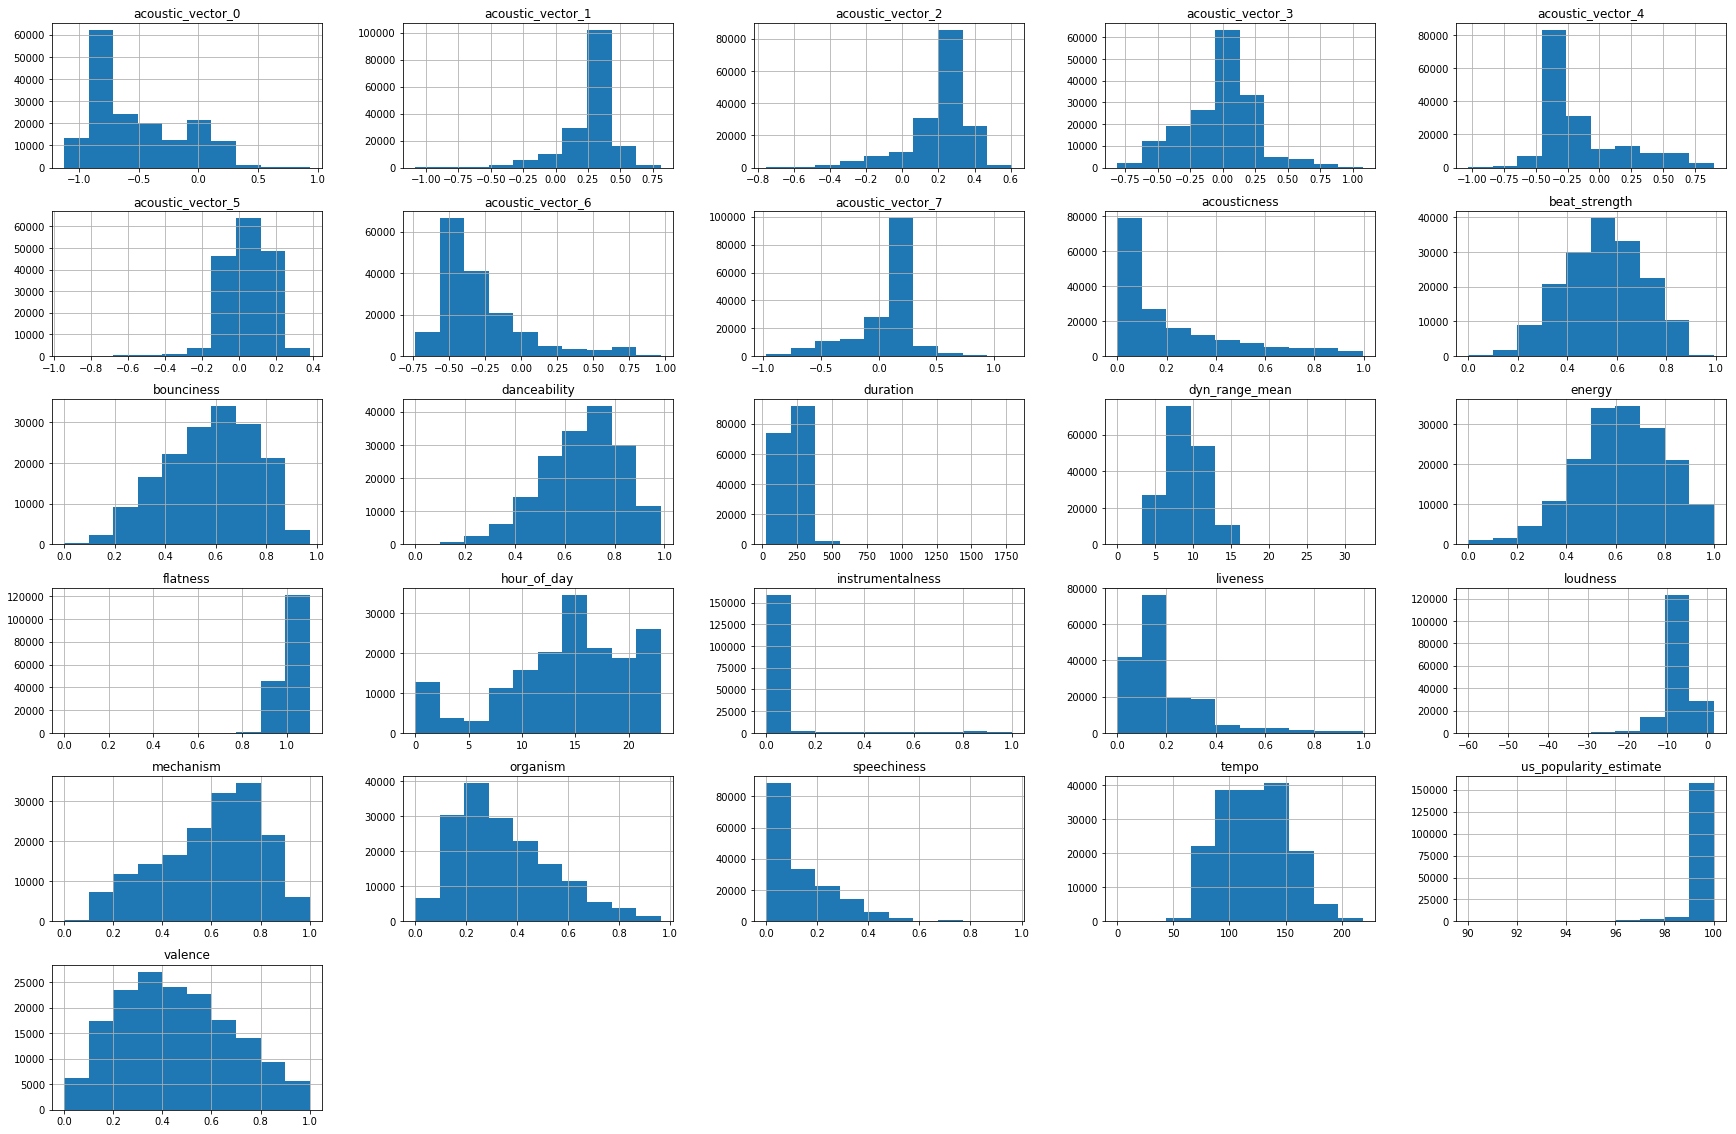

In [15]:
# Create continuous dataset and look at distributions for data
df_music_lin = df_music_log.drop(['release_year','mode','not_skipped','premium','key','time_signature',
                                  'hist_user_behavior_n_seekback','hist_user_behavior_n_seekfwd'], axis=1)
df_music_lin.hist(figsize = [30, 20]);

**Summary**: Only a few of the variables appear to have normal distributions.

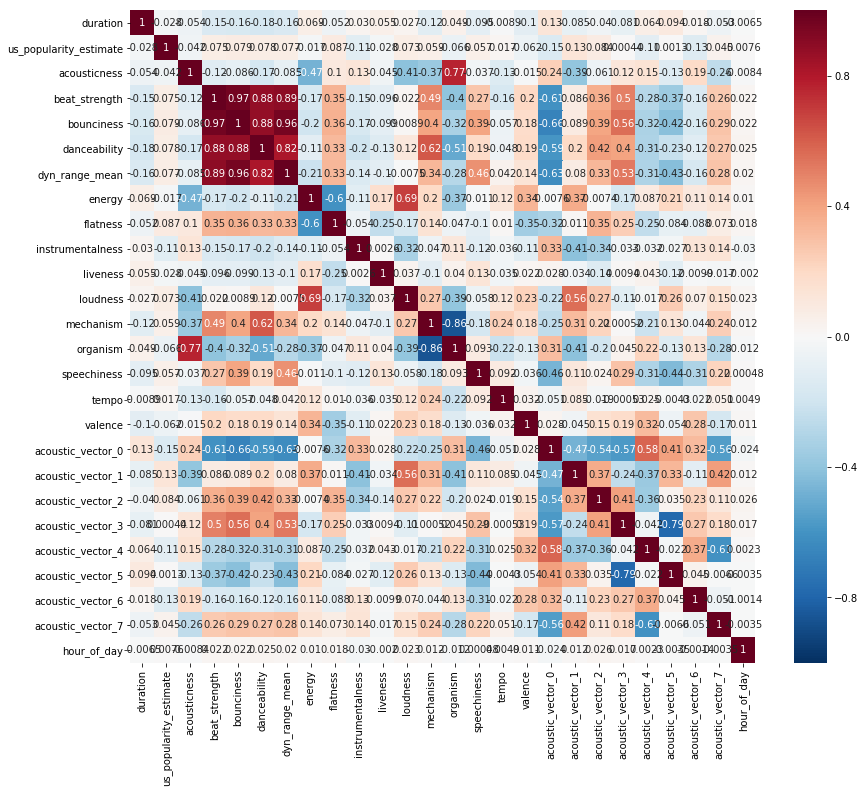

In [16]:
#Create coorelation heatmap - check for multicolinarity
from matplotlib import pyplot as plt
import seaborn as sns

correlation = df_music_lin.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

**Summary**: `beat_strength`, `bounciness`, `danceability` and `dyn_range_mean` seem to be highly correlated.
Secondarily, `acousticness` and `organism` also appear to be highly correlated. These columns are will be removed from the test/train dataset.

## Logistic Regression - Define X and Y

In [17]:
y = df_music_log['not_skipped']
X = df_music_log.drop('not_skipped', axis = 1)

## Normalize the Data
Normalize the data prior to fitting the model

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Removed beat_strength, bounciness, danceability, dyn_range_mean, acousticness, organism

x_feats = ['duration','release_year','us_popularity_estimate','energy','flatness','instrumentalness',
           'key','liveness','loudness','mechanism','mode','speechiness','tempo','time_signature',
           'valence','acoustic_vector_0','acoustic_vector_1','acoustic_vector_2','acoustic_vector_3',
           'acoustic_vector_4','acoustic_vector_5','acoustic_vector_6','acoustic_vector_7',
           'hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback','hour_of_day','premium']
X = pd.get_dummies(df_music_log[x_feats], drop_first=False)
y = df_music_log.not_skipped
X.head()

,duration,release_year,us_popularity_estimate,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,...,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,premium,mode_major,mode_minor
0,109.706673,1950,99.975414,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,...,0.832467,-0.213871,-0.299464,-0.675907,0,0,10,True,1,0
1,187.693329,1950,99.969430,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,...,0.371803,-0.420558,-0.213120,-0.525795,0,0,23,True,1,0
2,187.693329,1950,99.969430,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,...,0.371803,-0.420558,-0.213120,-0.525795,0,0,23,True,1,0
3,160.839996,1951,99.602549,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,...,0.411094,-0.187749,-0.387599,-0.433496,0,0,22,True,0,1
4,175.399994,1951,99.665018,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,...,0.614825,-0.111419,-0.265953,-0.542753,0,0,20,True,1,0


In [20]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Train-Test Split

Split the data into train and test sets.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.20, random_state=42)

## Fit the model

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = True, C=1e12)
model_log = logreg.fit(X_train, y_train)
model_log

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [23]:
print(y_train.value_counts())
print(y_test.value_counts())

False    89581
True     44723
Name: not_skipped, dtype: int64
False    22415
True     11161
Name: not_skipped, dtype: int64


## Predict

In [24]:
#Predict against test set using Sigmoid function
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [25]:
y_hat_test = logreg.predict_proba(X_test)
y_hat_test[0]

array([0.64399823, 0.35600177])

In [26]:
logreg.predict_proba(X_train)

array([[0.66163816, 0.33836184],
       [0.67822199, 0.32177801],
       [0.60253002, 0.39746998],
       ...,
       [0.62593965, 0.37406035],
       [0.6918441 , 0.3081559 ],
       [0.62752389, 0.37247611]])

66% chance 0 (False - not skipped) and 34% chance of 1 (True - not skipped)

## Initial evaluation

How may times was the classifier correct for the training set?

In [27]:
logreg.score(X_train, y_train)

0.6675452704312604

67% accuracy with the train set

### How may times was the classifier correct for the test set?

In [28]:
logreg.score(X_test, y_test)

0.6677388610912557

67% accuracy with the test set

In [29]:
logreg.coef_[0]

array([-0.14131722,  0.08035515,  0.032761  , -0.02373796, -0.03067927,
        0.00998299, -0.0010143 , -0.01596349,  0.00571504,  0.02006124,
        0.00141179, -0.01154383, -0.00654674, -0.00957017, -0.06041097,
       -0.10798891,  0.01128193, -0.13710822,  0.04428065,  0.005293  ,
        0.08526539, -0.00764276, -0.42163059,  0.19945167, -0.03088518,
        0.00873848,  0.00536838, -0.00536838])

In [30]:
for feature, weight in zip(X.columns, logreg.coef_[0]):
    print("{} has a weight of : {}".format(feature, weight))

duration has a weight of : -0.14131721552189022
release_year has a weight of : 0.08035514631586345
us_popularity_estimate has a weight of : 0.03276099949550302
energy has a weight of : -0.02373796467178363
flatness has a weight of : -0.030679265249588063
instrumentalness has a weight of : 0.009982994841192923
key has a weight of : -0.0010143039922427715
liveness has a weight of : -0.015963485787755537
loudness has a weight of : 0.0057150409492055425
mechanism has a weight of : 0.02006123562518704
speechiness has a weight of : 0.0014117912609817734
tempo has a weight of : -0.011543825280982122
time_signature has a weight of : -0.0065467352467311465
valence has a weight of : -0.009570166220926931
acoustic_vector_0 has a weight of : -0.06041097238939168
acoustic_vector_1 has a weight of : -0.10798891374695416
acoustic_vector_2 has a weight of : 0.011281927153131917
acoustic_vector_3 has a weight of : -0.1371082214826455
acoustic_vector_4 has a weight of : 0.04428064535341574
acoustic_vect

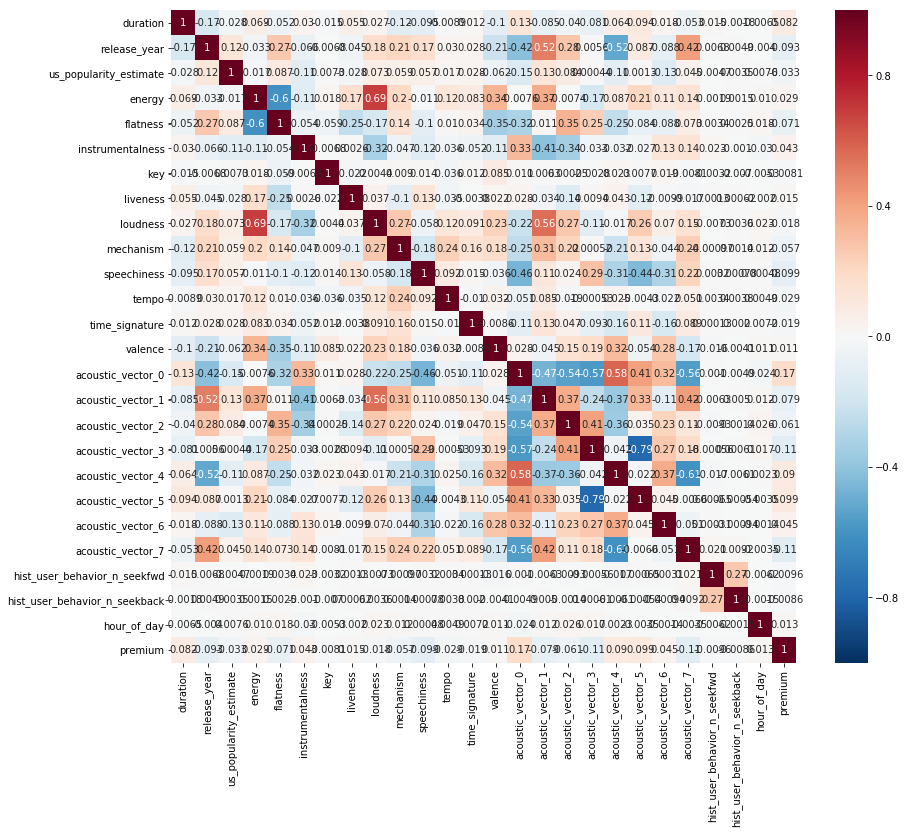

In [31]:
# Display correlation heatmap 
correlation = df_music_log[x_feats].corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

**Summary**: `energy` and `loudness` are candidates for removal.

## Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[89340   241]
 [44409   314]]


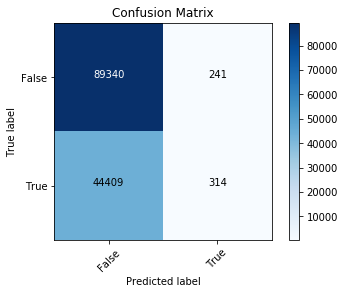

In [33]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

## ROC Metrics

Calculate the false positive rate and true positive rate (you can use the built in metrics from SciKit-Learn) of your classifier.

In [34]:
from sklearn.metrics import roc_curve, auc

#First calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model_log.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

## ROC Graph

Plot the Receiver Operating Characteristic Curve for both the train and test sets using the false positive rate and true positive rate.

AUC: 0.563186786754641


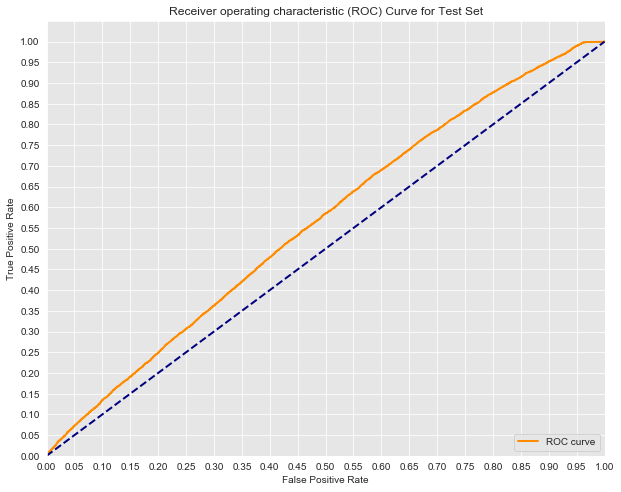

In [35]:
#Seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#Test Set
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

AUC: 0.5682500706257784


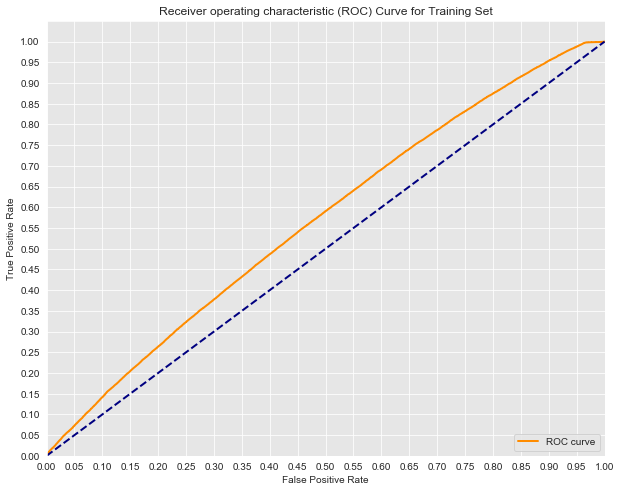

In [36]:
#Seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#Training Set
plt.figure(figsize=(10,8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

## SMOTE - Balance Data

Improve the model's performance on the minority class.

In [37]:
from imblearn.over_sampling import SMOTE, ADASYN

print(y_train.value_counts()) #Previous original class distribution
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

False    89581
True     44723
Name: not_skipped, dtype: int64
True     89581
False    89581
dtype: int64


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 0.001: 0.5625593389939711


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 0.01: 0.5626505275941849


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 0.1: 0.5628327209224514


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 1: 0.5628586109221703


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 10: 0.5628626720985968


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 100: 0.5628627640346773


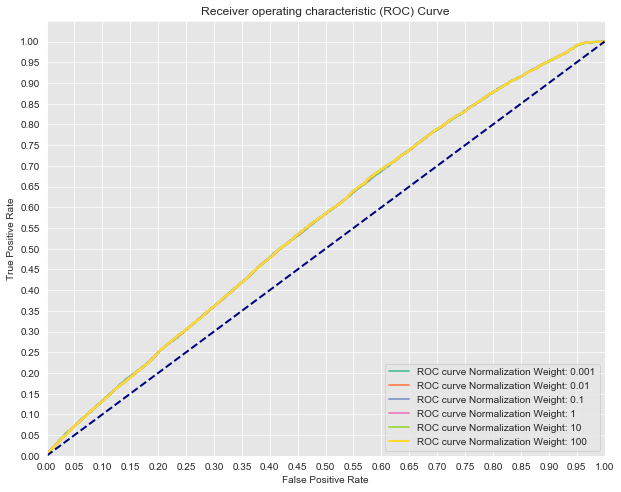

In [38]:
# Compare a few different regularization performances on the dataset:
C_param_range = [0.001,0.01,0.1,1,10,100]
names = [0.001,0.01,0.1,1,10,100]
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c) #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[11064  4554]
 [11351  6607]]


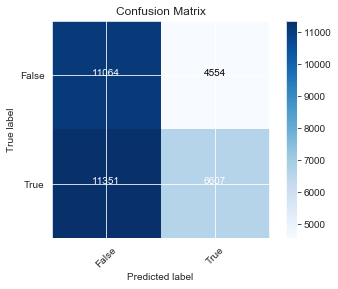

In [40]:
# Plot Confusion Matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

## Random Forest

Create a Decision Tree Classifier.

In [41]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
np.random.seed(0)

tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

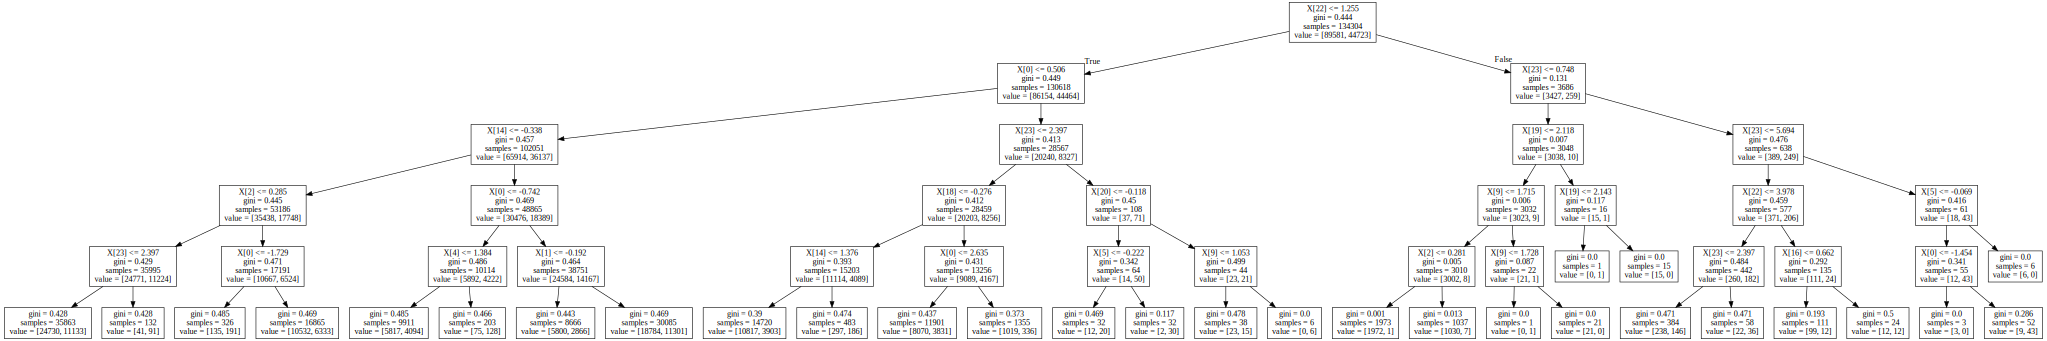

In [42]:
#Display Decision Tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

export_graphviz(tree_clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature Importance

Check the feature_importances_ attribute of our trained model to see what it displays.

In [42]:
tree_clf.feature_importances_

array([0.19408165, 0.0199863 , 0.07850314, 0.        , 0.0138509 ,
       0.00716911, 0.        , 0.        , 0.        , 0.00425928,
       0.        , 0.        , 0.        , 0.        , 0.07803405,
       0.        , 0.00446211, 0.        , 0.02147899, 0.00146336,
       0.0035473 , 0.        , 0.39352656, 0.17963725, 0.        ,
       0.        , 0.        , 0.        ])

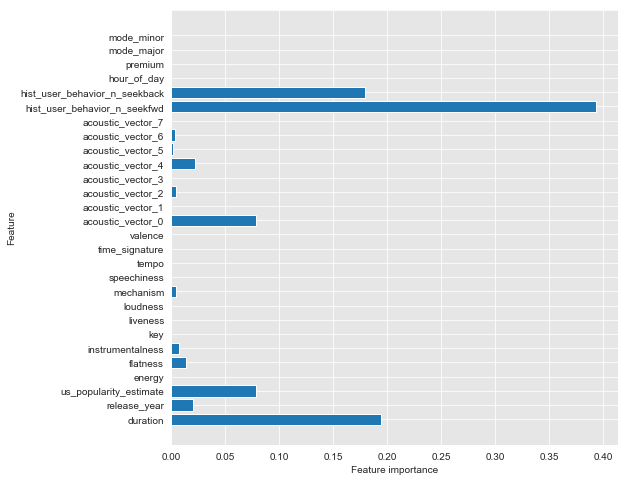

In [43]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

## Model performance

In [44]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[22306   109]
 [11048   113]]
              precision    recall  f1-score   support

       False       0.67      1.00      0.80     22415
        True       0.51      0.01      0.02     11161

   micro avg       0.67      0.67      0.67     33576
   macro avg       0.59      0.50      0.41     33576
weighted avg       0.62      0.67      0.54     33576



In [45]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 66.77%


### Create a RandomForestClassifier

In [46]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
# Check the training accuracy of the model using the .score() method
forest.score(X_train, y_train)

0.6682153919466285

In [48]:
# Check the testing accuracy of the model using the .score() method 
forest.score(X_test, y_test)

0.6683940910173933

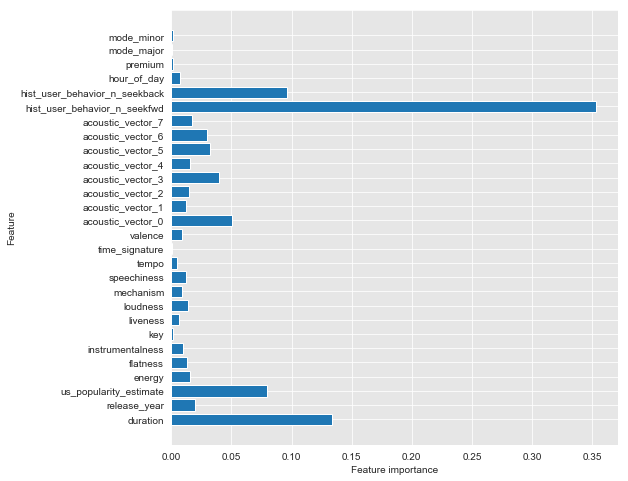

In [50]:
# Plot the feature importance
plot_feature_importances(forest)

**Top five features are**: `hist_user_behavior_n_seekfwd`, `duration`, `hist_user_behavior_n_seekback`, `us_popularity_estimate` and `acoustic_vector_0`.

In [49]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
rf_tree_1 = forest_2.estimators_[0]

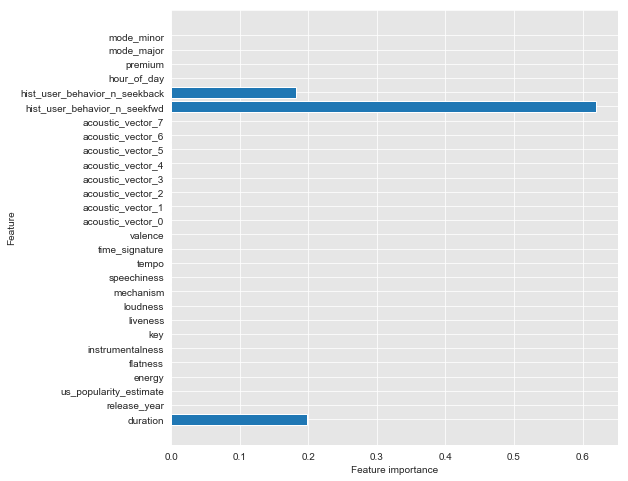

In [51]:
plot_feature_importances(rf_tree_1)

## XG Boost

Build a model that can accurately classify if a song will be skipped based on the features in the dataset.

In [52]:
import xgboost as xgb
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [53]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [54]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 67.08%
Validation accuracy: 66.99%
